data from https://www.kaggle.com/mattiuzc/commodity-futures-price-history


In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 파라매터 설정

In [4]:
SEQUENCE_LENGTH = 10
OFFSET = 1
BATCH_SIZE = 32

# 데이터 로딩

In [6]:
df = pd.read_csv("/gdrive/MyDrive/tmp/coin.csv")
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
print(len(df))

3613769


# 결측치 처리

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [13]:
df.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [11]:
df = df.dropna()

In [12]:
df.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3613769 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 248.1 MB


# 정렬 순서 확인

In [16]:
df.sort_values(by=["Timestamp"])

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [17]:
sorted_index = df.sort_values(by=["Timestamp"]).index

In [19]:
print(sorted_index)
print(sorted_index - df.index)
print(sum(sorted_index - df.index))

Int64Index([      0,     478,     547,     548,    1224,    1896,    2333,
               3612,    4553,    4710,
            ...
            4857366, 4857367, 4857369, 4857370, 4857371, 4857372, 4857373,
            4857374, 4857375, 4857376],
           dtype='int64', length=3613769)
Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            ...
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64', length=3613769)
0


#Adj close 중복확인


In [20]:
print(df['Close'] - df['Adj Close'])
print(sum(df['Close'] - df['Adj Close']))

KeyError: ignored

#불필요 컬럼 삭제

In [ ]:
df.drop(columns=["Date", "Adj Close"], inplace=True)

Open


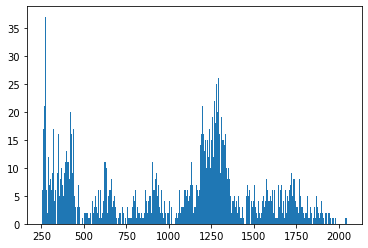

High


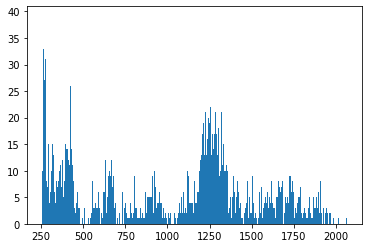

Low


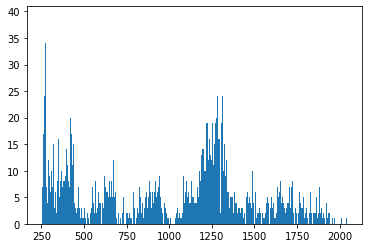

Close


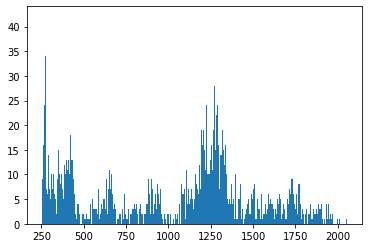

Volume


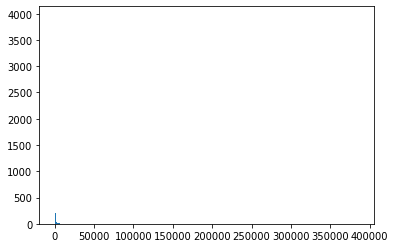

In [ ]:
for i in range(len(df.columns)):
    print(df.columns[i])
    plt.hist(df.iloc[:,i], bins=1000)
    plt.show()

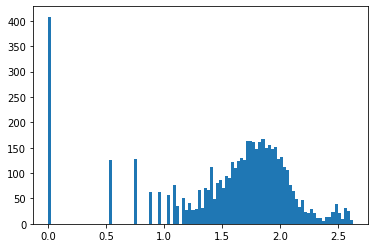

In [ ]:
plt.hist(np.log(df.Volume+1), bins=100)
plt.show()

#Volume을 로그 처리

In [ ]:
df['Volume'] = np.log(df.Volume + 1)

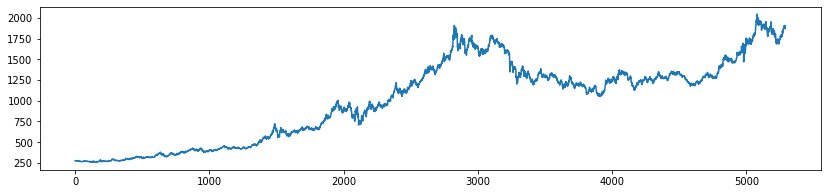

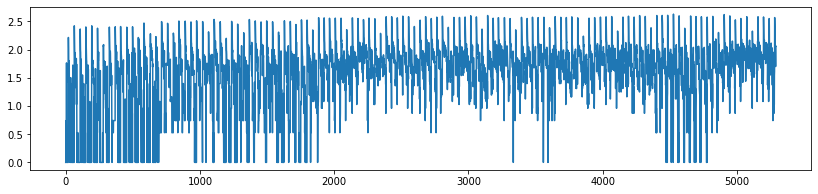

In [ ]:
plt.figure(figsize=(14,3))
plt.plot(df.iloc[:,0])
plt.show()

plt.figure(figsize=(14,3))
plt.plot(df.iloc[:,4])
plt.show()


In [ ]:
raw_data = df.to_numpy()
print(raw_data.shape)

(5179, 5)


In [ ]:
print(raw_data[:5])

[[273.899994   273.899994   273.899994   273.899994     0.        ]
 [274.799988   278.299988   274.799988   278.299988     0.        ]
 [277.         277.         277.         277.           0.        ]
 [275.799988   275.799988   275.799988   275.799988     0.74127631]
 [274.200012   274.200012   274.200012   274.200012     0.        ]]


# normalize

In [ ]:
maxs = raw_data.max(axis=0)
print(maxs)
mins = raw_data.min(axis=0)
print(mins)

[2045.5        2063.         2040.         2051.5           2.62932874]
[255.       256.100006 255.       255.100006   0.      ]


In [ ]:
normalized = (raw_data - mins) / (maxs - mins)
print(normalized[:5])

[[0.01055571 0.00985112 0.01058823 0.01046537 0.        ]
 [0.01105836 0.01228623 0.01109243 0.01291471 0.        ]
 [0.01228707 0.01156677 0.01232493 0.01219105 0.        ]
 [0.01161686 0.01090264 0.01165265 0.01152304 0.28192607]
 [0.01072327 0.01001716 0.01075631 0.01063238 0.        ]]


In [ ]:
preprocessed = normalized

# by Data Sampling

In [ ]:
numbers = preprocessed

In [ ]:
raw_x = []
raw_y = []

for i in range(len(numbers)):
  if i+SEQUENCE_LENGTH+OFFSET >= len(numbers): break
  raw_x.append(numbers[i:i+SEQUENCE_LENGTH,:])
  raw_y.append(numbers[i+SEQUENCE_LENGTH+OFFSET-1,:])
#              0         1              
#              01234567890123456789
# numbers[0] = 12345678901234567890
#                 i = 3
#                 <-x->   = [3:8] = 45678
#                      y  = [8]   = 9



In [ ]:
print(raw_x[0])
print(raw_y[0])
print()
print(raw_x[1])
print(raw_y[1])

[[0.01055571 0.00985112 0.01058823 0.01046537 0.        ]
 [0.01105836 0.01228623 0.01109243 0.01291471 0.        ]
 [0.01228707 0.01156677 0.01232493 0.01219105 0.        ]
 [0.01161686 0.01090264 0.01165265 0.01152304 0.28192607]
 [0.01072327 0.01001716 0.01075631 0.01063238 0.        ]
 [0.01061156 0.00990647 0.01064426 0.01052104 0.67092939]
 [0.0102206  0.00951906 0.01025209 0.01013136 0.        ]
 [0.01010891 0.00940838 0.01014006 0.01002004 0.        ]
 [0.0099972  0.00929769 0.01002801 0.0099087  0.        ]
 [0.00994135 0.00924234 0.00997198 0.00985303 0.        ]]
[0.00971795 0.00902097 0.0097479  0.00963037 0.        ]

[[0.01105836 0.01228623 0.01109243 0.01291471 0.        ]
 [0.01228707 0.01156677 0.01232493 0.01219105 0.        ]
 [0.01161686 0.01090264 0.01165265 0.01152304 0.28192607]
 [0.01072327 0.01001716 0.01075631 0.01063238 0.        ]
 [0.01061156 0.00990647 0.01064426 0.01052104 0.67092939]
 [0.0102206  0.00951906 0.01025209 0.01013136 0.        ]
 [0.01010891 

In [ ]:
x = np.array(raw_x)
y = np.array(raw_y)
print(x.shape)
print(y.shape)

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, shuffle=True)


print("Training Data:")
print(train_x.shape)
print(train_y.shape)

print("Test Data:")
print(test_x.shape)
print(test_y.shape)


(5168, 10, 5)
(5168, 5)
Training Data:
(4651, 10, 5)
(4651, 5)
Test Data:
(517, 10, 5)
(517, 5)


train_x[0]
 [[0.2240715  0.22364271 0.22296919 0.22578491 0.5812993 ]
 [0.2266406  0.22397475 0.22577031 0.22322421 0.44204557]
 [0.21982685 0.21722285 0.22050419 0.22016253 0.41091013]
 [0.22055293 0.21794234 0.22123251 0.22177688 0.33078469]
 [0.22060877 0.21827439 0.22128852 0.22055221 0.53580208]
 [0.21926835 0.21666942 0.21568627 0.21543085 0.62045129]
 [0.21524715 0.21440035 0.21591038 0.2152082  0.59532938]
 [0.21720191 0.21711219 0.21787116 0.21843687 0.64834551]
 [0.21921251 0.21755493 0.21988796 0.21877086 0.59884682]
 [0.22440658 0.22176102 0.22509803 0.22344689 0.20027508]]

train_y[0]
 [0.21971518 0.21711219 0.22039217 0.21893789 0.52192284]


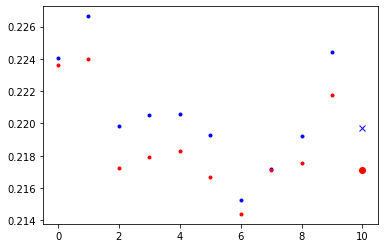

In [ ]:
print("train_x[0]\n", train_x[0])
print()
print("train_y[0]\n", train_y[0])

plt.plot(train_x[0].T[0], '.', color='blue')
plt.plot([len(train_x[0])], train_y[0,0], 'x', color='blue')
plt.plot(train_x[0].T[1], '.', color='red')
plt.plot([len(train_x[0])], train_y[0,1], 'o', color='red')

plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               68608     
                                                                 
 flatten_2 (Flatten)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 69,253
Trainable params: 69,253
Non-trainable params: 0
_________________________________________________________________


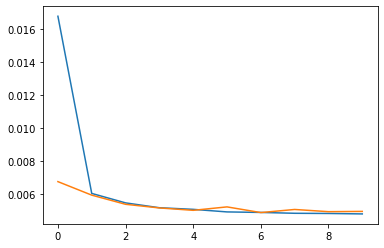

17/17 [==============================] - 0s 6ms/step - loss: 0.0043 - mape: 2557893.7500
loss= 0.004260549321770668
mape= 2557893.75


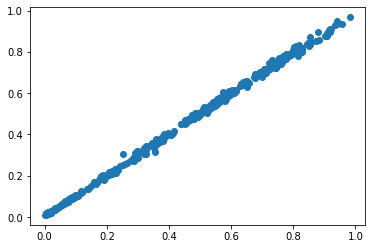

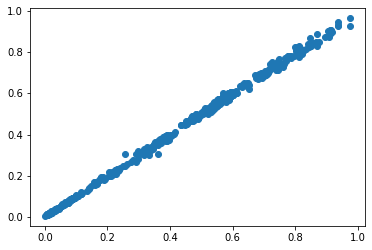

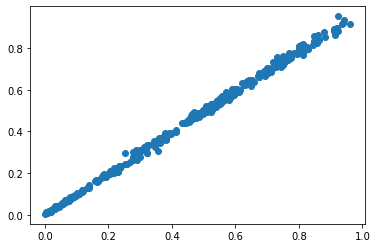

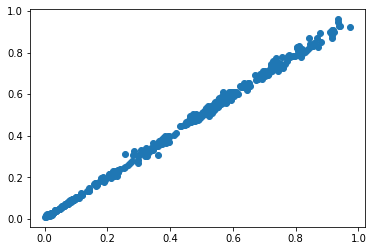

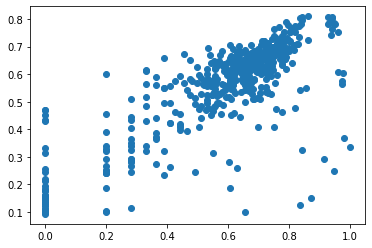

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
output_shape = train_y.shape[-1]

model = keras.Sequential()
model.add(LSTM(128, input_shape=input_shape))
model.add(Flatten())
model.add(Dense(output_shape))
model.compile(loss="mse", optimizer="adam", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=BATCH_SIZE)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)



y_ = model.predict(test_x).squeeze()
for i in range(output_shape):
    plt.scatter(test_y[:,i], y_[:,i])
    plt.show()

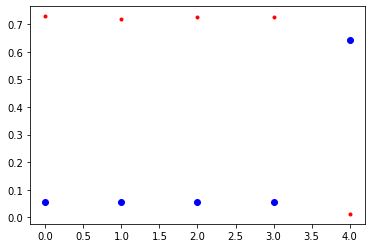

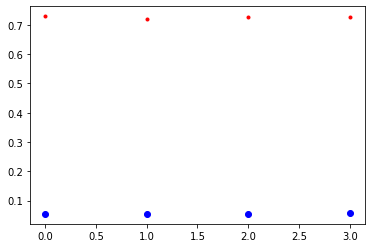

In [ ]:
plt.plot(test_y[0], 'bo')
plt.plot(y_[0], 'r.')
plt.show()

plt.plot(test_y[0,:-1], 'bo')
plt.plot(y_[0,:-1], 'r.')
plt.show()

In [ ]:
denomalized_test_y = test_y * (maxs - mins) + mins
denomalized_y_ = y_ * (maxs - mins) + mins

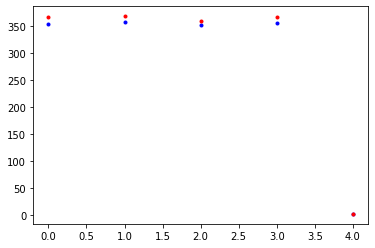

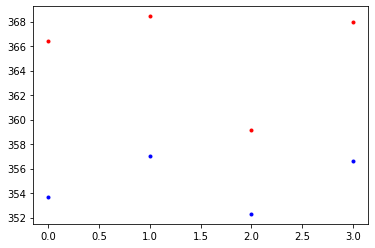

In [ ]:
plt.plot(denomalized_test_y[0], 'b.')
plt.plot(denomalized_y_[0], 'r.')
plt.show()

plt.plot(denomalized_test_y[0,:-1], 'b.')
plt.plot(denomalized_y_[0,:-1], 'r.')
plt.show()

# by Keras Sequence Data Generator

In [ ]:
from tensorflow.keras.utils import Sequence

class DataGenerator(Sequence):

    def __init__(self, numbers, 
                 sequence_length=SEQUENCE_LENGTH, 
                 offset=OFFSET, 
                 batch_size=BATCH_SIZE, 
                 shuffle=True,
                 validation_split=0.0,
                 test_split=0.0,
                 indexes=None):
        self.numbers = numbers
        self.sequence_length = sequence_length
        self.offset = offset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes, self.valid_indexes, self.test_indexes = self._prepare_indexes(validation_split, test_split, indexes)

    def __len__(self):
        return int(np.floor(len(self.indexes) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        return self._generate_data(indexes)

    def on_epoch_end(self):
        self._shuffle_index()

    def _prepare_indexes(self, validation_split, test_split, indexes):
        if indexes is not None:
            return indexes, None, None

        data_count = len(self.numbers) - (self.sequence_length+self.offset) + 1
        all_index = np.arange(data_count)
        np.random.shuffle(all_index)
        if validation_split+test_split==0.0:
            return all_index, None, None

        valid_i = int(len(all_index)*(1-validation_split-test_split))
        test_i = int(len(all_index)*(1-test_split))

        return all_index[:valid_i], all_index[valid_i:test_i], all_index[test_i:]
        
    def _shuffle_index(self):
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def _generate_data(self, indexes):
        X = np.empty((len(indexes), self.sequence_length, self.numbers.shape[-1]))
        Y = np.empty((len(indexes), self.numbers.shape[-1]))

        for i, index in enumerate(indexes):
            X[i] = self.numbers[index:index+self.sequence_length]
            Y[i] = self.numbers[index+self.sequence_length+self.offset-1]
        return X, Y

    def get_all_data(self):
        return self._generate_data(self.indexes)        

    def subset(self, type):
        if type=="train":
            return DataGenerator(self.numbers, indexes=self.indexes)
        elif type=="validation" or type=="valid":
            return DataGenerator(self.numbers, indexes=self.valid_indexes)
        elif type=="test":
            return DataGenerator(self.numbers, indexes=self.test_indexes)
        else:
            print("invalid type {}".format(type))

In [ ]:
data_generator = DataGenerator(preprocessed, validation_split=0.1, test_split=0.1)
train_data_generator = data_generator.subset("train")
valid_data_generator = data_generator.subset("valid")
test_data_generator = data_generator.subset("test")

batch_x, batch_y = train_data_generator.__getitem__(0)
print(batch_x.shape)
print(batch_y.shape)
print(batch_x[0])
print(batch_y[0])

print(len(preprocessed)-(SEQUENCE_LENGTH+OFFSET)+1)
print(len(train_data_generator.indexes))
print(len(valid_data_generator.indexes))
print(len(test_data_generator.indexes))

(32, 10, 5)
(32, 5)
[[5.32365234e-01 5.29581049e-01 5.30308110e-01 5.30171452e-01
  9.26659316e-04]
 [5.29516881e-01 5.25707010e-01 5.21960757e-01 5.20485400e-01
  1.44952295e-03]
 [5.22535591e-01 5.26260444e-01 5.22240869e-01 5.23046063e-01
  4.73683393e-04]
 [5.28902541e-01 5.43416900e-01 5.30532213e-01 5.43531506e-01
  8.12768226e-04]
 [5.45210808e-01 5.41535211e-01 5.44313712e-01 5.42084180e-01
  7.92060756e-04]
 [5.42641707e-01 5.39653522e-01 5.38487368e-01 5.39968812e-01
  6.83346534e-04]
 [5.43311951e-01 5.37771900e-01 5.38487368e-01 5.38243151e-01
  5.25452070e-04]
 [5.40686946e-01 5.35170720e-01 5.28515420e-01 5.30004425e-01
  1.99309406e-04]
 [5.26221698e-01 5.34561955e-01 5.25322101e-01 5.22600769e-01
  5.77220747e-04]
 [5.26780202e-01 5.22165019e-01 5.20448179e-01 5.22823450e-01
  2.43312781e-04]]
[5.22032924e-01 5.26426502e-01 5.23641429e-01 5.23046063e-01
 5.09921467e-04]
5169
4135
517
517


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 128)               68608     
                                                                 
 flatten_3 (Flatten)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 5)                 645       
                                                                 
Total params: 69,253
Trainable params: 69,253
Non-trainable params: 0
_________________________________________________________________


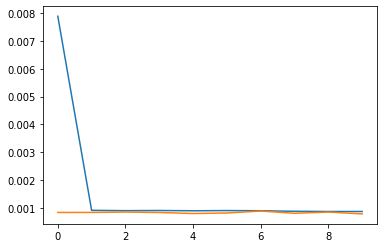

16/16 [==============================] - 0s 6ms/step - loss: 0.0012 - mape: 95759.0156 
loss= 0.0012221669312566519
mape= 95759.015625


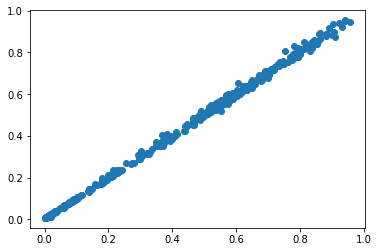

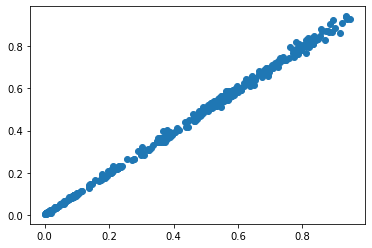

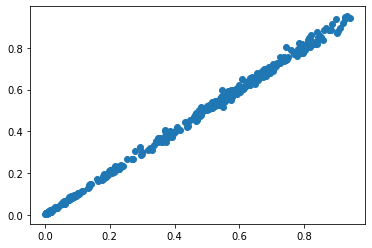

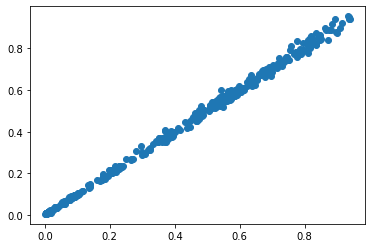

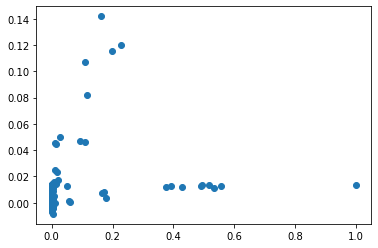

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = (SEQUENCE_LENGTH, preprocessed.shape[-1])
output_shape = preprocessed.shape[-1]

model = keras.Sequential()
model.add(LSTM(128, input_shape=input_shape))
model.add(Flatten())
model.add(Dense(output_shape))
model.compile(loss="mse", optimizer="adam", metrics=["mape"])
model.summary()

history = model.fit(train_data_generator, epochs=10, verbose=0, validation_data=valid_data_generator)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_data_generator)
print("loss=", loss)
print("mape=", mape)


batch_x, batch_y = test_data_generator.get_all_data()
y_ = model.predict(batch_x).squeeze()
for i in range(output_shape):
    plt.scatter(batch_y[:,i], y_[:,i])
    plt.show()